In [77]:
class Letter:
    def __init__(self, path):
        self.path = path
        self.image = mpimg.imread(path)
        
    def vector(self):
        L = []
        (n,p) = np.shape(self.image)
        for i in range(n):
            for j in range(p):
                L.append(self.image[i,j])
        return L
    
    def letter_border(self):
        image =self.image
        (x_lenght, y_lenght) = image.shape
        x_min = x_lenght
        x_max = 0
        y_min = y_lenght
        y_max = 0
        for i in range(x_lenght):
            for j in range(y_lenght):
                if image[i,j]!=0:
                    if i < x_min:
                        x_min = i
                    if i > x_max:
                        x_max = i
                    if j < y_min:
                        y_min = j
                    if j > y_max:
                        y_max = j
        return (x_lenght,y_lenght,x_min,x_max,y_min,y_max)
    
    def barycentre(self):
        image = self.image
        x_lenght,y_lenght,x_min,x_max,y_min,y_max = self.letter_border()
        x_pos, y_pos = [], []
        for i in range(x_lenght):
            for j in range(y_lenght):
                if image[i,j]!=0:
                    x_pos.append(i)
                    y_pos.append(j)
        aire = len(x_pos)
        M10 = sum(x_pos)
        M01 = sum(y_pos)
        bary = [int(M10/aire),int(M01/aire)]

        dist_bary_x = max(abs(x_min-bary[0]),abs(x_max-bary[0]))
        dist_bary_y = max(abs(y_min-bary[1]),abs(y_max-bary[1]))

        return (bary,dist_bary_x,dist_bary_y)
    
    def resized(self):
        image = self.image
        bary,dist_bary_x,dist_bary_y = self.barycentre()
        margin = max(dist_bary_x,dist_bary_y) + 5
        x_min_border = bary[0]- margin
        x_max_border = bary[0]+ margin
        y_max_border = bary[1]+ margin
        y_min_border = bary[1]- margin
        return image[x_min_border:x_max_border,y_min_border:y_max_border]


In [79]:
letter_array = ['B','C','D','E','F','G','H','I','J','K']

for letter in range(0,10):
    for i in range(1,251):
        path = 'data/' + letter_array[letter] + str(i) + '.bmp'
        letter = Letter(path)
        image = Image.open(
        letter.resized().save('test'+ letter_array[letter] + str(i) + '.bmp', 'bmp')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

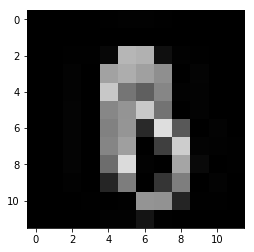

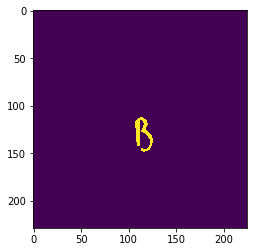

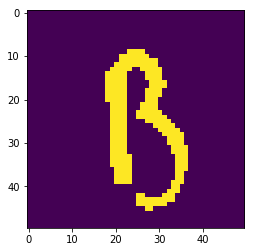

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image_1 = Letter('data/B1.bmp')

from PIL import Image

img = Image.open('data_resized/B1.bmp')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)
plt.show()
plt.imshow(image_1.image)
plt.show()
plt.imshow(image_1.resized())
plt.show()